In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path+'flights.csv')

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
flights_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-22,B6,B6,B6,984,B6,N281JB,984,14492,RDU,...,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-22,B6,B6,B6,987,B6,N978JB,987,10721,BOS,...,2611,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-08-22,B6,B6,B6,988,B6,N983JT,988,12892,LAX,...,2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-22,B6,B6,B6,989,B6,N339JB,989,10721,BOS,...,399,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-08-22,B6,B6,B6,990,B6,N583JB,990,13204,MCO,...,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.



In [7]:
 

# A normal distribution has some interesting properties: it has a bell shape, the mean and median are equal, 
# and 68% of the data falls within 1 standard deviation.

In [8]:
# Many types of delays, lets take a look at all them

flights_df.loc[(flights_df['dep_delay'].notna()) & 
               (flights_df['arr_delay'].notna()) & 
               (flights_df['carrier_delay'].notna()) & 
               (flights_df['weather_delay'].notna()) & 
               (flights_df['nas_delay'].notna()) &
               (flights_df['security_delay'].notna()) &
               (flights_df['late_aircraft_delay'].notna()), 
              ['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].head(20)


# We see that dep_delay and arr_delay are the combinations of:
# carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay
# Plus extra noise delay
# for example rowindex position 3 has a carrier delay which accounts for arr_delay, but there was dep_delay (unaccounted)

# Therefore dep_delay and arr_delay take into account the other types of delay plus more.
# Lets work on those two instead

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,53.0,39.0,39.0,0.0,0.0,0.0,0.0
3,19.0,18.0,18.0,0.0,0.0,0.0,0.0
6,3.0,31.0,3.0,0.0,28.0,0.0,0.0
7,15.0,15.0,0.0,0.0,0.0,0.0,15.0
9,15.0,19.0,11.0,0.0,4.0,0.0,4.0
11,144.0,140.0,0.0,0.0,106.0,0.0,34.0
14,33.0,35.0,19.0,0.0,2.0,0.0,14.0
19,167.0,146.0,0.0,146.0,0.0,0.0,0.0
25,114.0,111.0,55.0,0.0,0.0,0.0,56.0
29,179.0,190.0,0.0,0.0,190.0,0.0,0.0


In [9]:
# Test for and remove outliers as the presence of these will throw off a normal distribution 
# Lets use the IQR to detect and remove outliers

# Get values from dep_delay and arr_delay and ignore missing values
dep_delay_values = flights_df.loc[flights_df['dep_delay'].notna() ,'dep_delay']
arr_delay_values = flights_df.loc[flights_df['arr_delay'].notna(), 'arr_delay']

### dep_delay

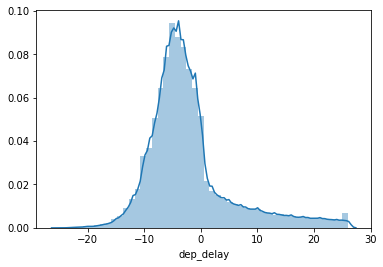

In [66]:
# First dep_delay
# Removing outliers

Q1_dep_delay = dep_delay_values.quantile(0.25)
Q3_dep_delay = dep_delay_values.quantile(0.75)
IQR_dep_delay = Q3_dep_delay - Q1_dep_delay

# Remove outliers from dep_delay using IQR range
dep_delay_values_ol_removed = dep_delay_values.loc[~((dep_delay_values < (Q1_dep_delay - 1.5 * IQR_dep_delay)) | (dep_delay_values > (Q3_dep_delay + 1.5 * IQR_dep_delay)))]

sns.distplot(dep_delay_values_ol_removed[:100000])

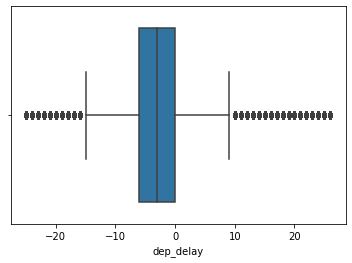

In [58]:
sns.boxplot(dep_delay_values_ol_removed)

In [60]:
print('Mean: ',dep_delay_values_ol_removed.mean())
print( 'Median: ',dep_delay_values_ol_removed.median())

Mean:  -1.4782968402227437
Median:  -3.0


In [53]:
# Shapiro wilks test on all samples

shapiro_test = stats.shapiro(dep_delay_values_ol_removed)
shapiro_test

C:\Users\Jesse\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8873580694198608, 0.0)

In [62]:
# Shapiro wilks test on 1000 samples
n = 1000  # for 2 random indices
index = np.random.choice(dep_delay_values_ol_removed.shape[0], n, replace=False) 

x_random = dep_delay_values_ol_removed.values[index]
shapiro_test = stats.shapiro(x_random)
shapiro_test

# P-value is very small < 0.05, therefore we can reject the null hypothesis that this sample came from a normal distribution

(0.8950074315071106, 1.4739478979172982e-25)

### arr_delay

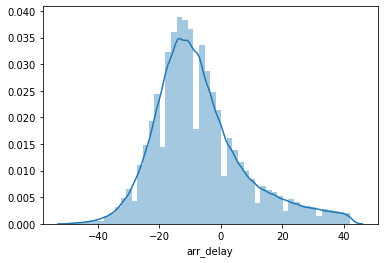

In [10]:
# First arr_delay

Q1_arr_delay = arr_delay_values.quantile(0.25)
Q3_arr_delay = arr_delay_values.quantile(0.75)
IQR_arr_delay = Q3_arr_delay - Q1_arr_delay

# Remove outliers from dep_delay using IQR range
arr_delay_values_ol_removed = arr_delay_values.loc[~((arr_delay_values < (Q1_arr_delay - 1.5 * IQR_arr_delay)) | (arr_delay_values > (Q3_arr_delay + 1.5 * IQR_arr_delay)))]

sns.distplot(arr_delay_values_ol_removed[:100000])

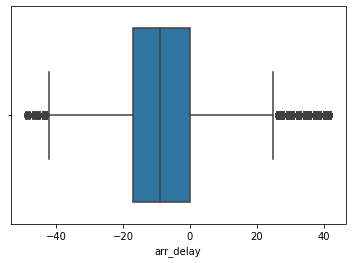

In [68]:
sns.boxplot(arr_delay_values_ol_removed[:100000])

In [69]:
print('Mean: ', arr_delay_values_ol_removed.mean())
print( 'Median: ', arr_delay_values_ol_removed.median())

Mean:  -5.453712536705871
Median:  -8.0


In [70]:
# Shapiro wilks test on all samples
shapiro_test = stats.shapiro(arr_delay_values_ol_removed)
shapiro_test

C:\Users\Jesse\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9392585754394531, 0.0)

In [11]:
# Shapiro wilks test on 1000 samples
n = 1000  # for 2 random indices
index = np.random.choice(arr_delay_values_ol_removed.shape[0], n, replace=False) 

x_random = arr_delay_values_ol_removed.values[index]
shapiro_test = stats.shapiro(x_random)
shapiro_test


# P-value is very small < 0.05, therefore we can reject the null hypothesis that this sample came from a normal distribution

(0.965774655342102, 1.3959540039751653e-14)